<a href="https://colab.research.google.com/github/Bennyhwanggggg/FPredictor/blob/master/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Prerequisites**

First we need to install TensorFlow.js CLI for converting the model into the format readable by TensorFlow.js. It's necessary to use 1.0.1 for the compatibility with TensorFlow core.

In [0]:
!pip install tensorflowjs==1.0.1

from google.colab import files
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.applications import imagenet_utils

tf.__version__

In [0]:
def prepare_image(file):
    '''
    Function to make the image into the multi dimentional tensor.
    '''
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Upload your own image

This uploaded image is used for fine tuning the pre-trained MobileNet model. Please take a look into [Fine-Tuning](https://www.tensorflow.org/hub/fine_tuning) for more detail.

In [0]:
from google.colab import files
files.upload()

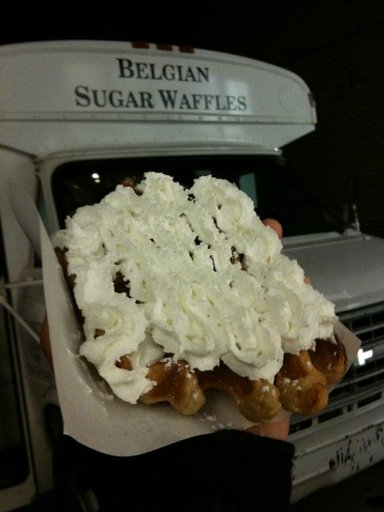

In [0]:
from IPython.display import Image
Image('6312.jpg')

# Load Pretrained MobileNet

In [0]:
# TODO: Rename the image 
X = prepare_image('6312.jpg')
y = np.zeros([1, 1000])
y[0][154] = 1 # Pekingese

model = MobileNet(include_top = True, weights = 'imagenet', input_shape=None)

# Fine tune with the given image
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=X, y=y)


# Prediction Test
predictions = model.predict(X)
results = imagenet_utils.decode_predictions(predictions)
results

17227776/17225924 [==============================] - 1s 0us/step
Train on 1 samples
40960/35363 [==================================] - 0s 0us/step


[[('n01978287', 'Dungeness_crab', 0.109675445),
  ('n07711569', 'mashed_potato', 0.06534076),
  ('n07579787', 'plate', 0.059681017),
  ('n02948072', 'candle', 0.047483377),
  ('n07860988', 'dough', 0.046705287)]]

In [9]:
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16

f = h5py.File("../food_c101_n10099_r64x64x3.h5")

print(list(f.keys()))

X = np.array(f["images"])/255.
Y = np.array([[int(i) for i in f["category"][j]] for j in range(len(f["category"]))])

model = VGG16(weights=None, input_shape=(64, 64, 3), classes=101)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

# Fine tune with the given image
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.97, epsilon=1e-7), metrics=['accuracy'])
model.fit(x=train_x[:256], y=train_y[:256], batch_size=128, epochs=150, shuffle=False)

['category', 'category_names', 'images']
Train on 256 samples
Epoch 1/150
256/256 [==============================] - 56s 220ms/sample - loss: 4.6150 - accuracy: 0.0117
Epoch 2/150
256/256 [==============================] - 55s 215ms/sample - loss: 4.6091 - accuracy: 0.0234
Epoch 3/150
256/256 [==============================] - 56s 218ms/sample - loss: 4.5637 - accuracy: 0.0234
Epoch 4/150
256/256 [==============================] - 56s 218ms/sample - loss: 4.5381 - accuracy: 0.0117
Epoch 5/150
256/256 [==============================] - 55s 216ms/sample - loss: 4.4012 - accuracy: 0.0273
Epoch 6/150
256/256 [==============================] - 55s 216ms/sample - loss: 4.4355 - accuracy: 0.0195
Epoch 7/150
256/256 [==============================] - 56s 217ms/sample - loss: 4.4387 - accuracy: 0.0195
Epoch 8/150
256/256 [==============================] - 56s 218ms/sample - loss: 4.4086 - accuracy: 0.0195
Epoch 9/150
256/256 [==============================] - 56s 218ms/sample - loss: 4.3967 - a

# Save and Download the model

After the fine-tuning with the given image, this section serialize the model and makes it into the format readable by TensorFlow.js. The model can be loaded by `loadLayersModel` of TensorFlow.js.


In [10]:
!rm -rf ./mymobilenet2* ./model2.h5
model.save('./model2.h5')


!tensorflowjs_converter --input_format=keras ./model2.h5 ./mymobilenet2

!zip -r ./mymobilenet2.zip ./mymobilenet2 
# files.download( "./mymobilenet2.zip" )

  adding: mymobilenet2/ (stored 0%)
  adding: mymobilenet2/group1-shard14of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard34of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard3of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard7of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard11of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard13of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard30of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard27of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard16of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard28of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard39of39.bin (deflated 8%)
  adding: mymobilenet2/group1-shard20of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard32of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard1of39.bin (deflated 8%)
  adding: mymobilenet2/group1-shard22of39.bin (deflated 9%)
  adding: mymobilenet2/group1-shard36of39.bin (deflated 9%)
  addin